<a href="https://colab.research.google.com/github/start-dash/Intro-to-ML/blob/main/HW4_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW4, Q1: SVM Classifier

In [1]:
# Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N = 1, ..., K)
# 1. Identify the optimum number of K, principal components that achieve the highest classifcation accuracy.
# 2. Plot your classification accuracy, precision, and recall over a different number of Ks.
# 3. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.
# 4. Compare your results against the logistic regression that you have done in HW 3.

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Create a classifier
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
#Creating an SVM classifier
from sklearn import svm
# "Linear Support vector classifier"
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA

#As an example of support vector machines in action, let's take a look at the facial recognition problem.
from sklearn.datasets import fetch_lfw_people
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mode
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

from ipywidgets import interact, fixed
#let's look at some data that is not linearly separable:
from sklearn.datasets import make_circles
from mpl_toolkits import mplot3d
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#Finally, we can use a grid search cross-validation to explore combinations of parameters.
#Here we will adjust C (which controls the margin hardness)
#We also explore gamma (which controls the size of the radial basis function kernel)
#and determine the best model:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# For better accuracy
from sklearn.datasets import load_breast_cancer
# Evaluate the model using evaluation metrics: Accuracy, precision, and recall.
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering

Load URL

In [2]:
url = "https://raw.githubusercontent.com/start-dash/Intro-to-ML/main/Datasets/cancer.csv"
cancer = pd.read_csv(url)
breast_set = load_breast_cancer()
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Preprocessing

In [3]:
X = breast_set.data
print(X.shape)
Y = breast_set.target
breast_input = pd.DataFrame(X)
breast_input.head()

(569, 30)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Split the Data set into Training Data and Test Data.
# Training data will be used to train the Logistic model and Test data will be used to validate the model.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.20, random_state = 0) # 80% and 20% split between training and evaluation (test).
# Proper scaling is done via feature scaling, or scaling the data b/w 0 and 1 to get better accuracy.
# Scaling is important since theere is a huge difference between all the X inputs. This also standardizes.
# Scaler object is made
sc_X = StandardScaler()
# The scaler is fit to the training data and transform
X_train = sc_X.fit_transform(X_train)
# Apply the scaler to the test data
X_test = sc_X.transform(X_test)
X = sc_X.fit_transform(breast_input)

PCA Feature Extraction

In [5]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
Y_pred = classifier.fit(X_train, Y_train).predict(X_test)
def get_results(Y_test, Y_pred):
    acc = metrics.accuracy_score(Y_test, Y_pred)
    pre = metrics.precision_score(Y_test, Y_pred)
    rec = metrics.recall_score(Y_test, Y_pred)
    fscore = metrics.f1_score(Y_test, Y_pred)
    print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
    print("Precision:",metrics.precision_score(Y_test, Y_pred))
    print("Recall:",metrics.recall_score(Y_test, Y_pred))
    print("F1-Score:",metrics.f1_score(Y_test, Y_pred))
    return [acc*100.0, pre*100.0, rec*100.0, fscore*100.0]
def logist_model_training_pca(X, Y):
    n=X.shape[1]
    acc_list=[]
    recall_list=[]
    precision_list=[]
    f1score_list = []
    k_list=[]
    for i in range(n):
        print("K = "+ str(i+1))
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9999)
        #classifier = LogisticRegression(penalty='l2', C=1, solver = 'lbfgs')
        classifier = LogisticRegression(random_state=9)
        classifier.fit(X_train, y_train)
        Y_pred = classifier.predict(X_test)
        re = get_results(y_test, Y_pred)
        acc_list.append(re[0])
        precision_list.append(re[1])
        recall_list.append(re[2])
        f1score_list.append(re[3])
        k_list.append(i+1)
        print(metrics.classification_report(y_test, Y_pred))
        print(metrics.confusion_matrix(y_test, Y_pred))
    high_acc = max(acc_list)
    high_acc_k=acc_list.index(max(acc_list))+1
    print("----------------")
    print("Highest Classification Accuracy Achieved: "+ str(high_acc)+" for K number = "+str(high_acc_k))
    return k_list, acc_list, precision_list, recall_list, f1score_list
def plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list):
    plt.plot(k_list, acc_list, label = "Accuracy")
    plt.plot(k_list, precision_list, label = "Precision")
    plt.plot(k_list, recall_list, label = "Recall")
    plt.plot(k_list, f1score_list, label = "F1-Score")
    plt.legend()
    plt.title('Plotting classification accuracy, precision, recall and F1-score over a different number of Ks')
    plt.ylabel('Value')
    plt.xlabel('K')
    plt.show()

In [6]:
k_list, acc_list, precision_list, recall_list, f1score_list  = logist_model_training_pca(X,Y)

K = 1
Accuracy: 0.9298245614035088
Precision: 0.9487179487179487
Recall: 0.9487179487179487
F1-Score: 0.9487179487179487
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.95      0.95      0.95        78

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

[[32  4]
 [ 4 74]]
K = 2
Accuracy: 0.9385964912280702
Precision: 0.9382716049382716
Recall: 0.9743589743589743
F1-Score: 0.9559748427672956
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        36
           1       0.94      0.97      0.96        78

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

[[31  5]
 [ 2 76]]
K = 3
Accuracy: 0.9649122807017544
Precision: 0.9743589743589743
R

Plotting through a different number of Ks

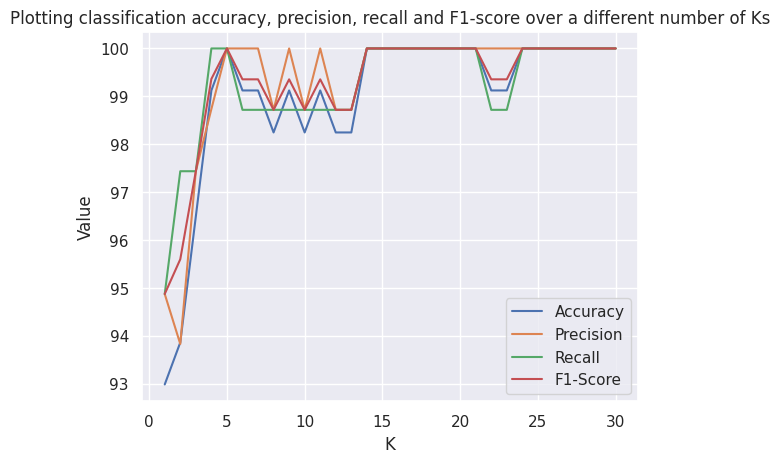

In [7]:
plot_result_with_k(k_list, acc_list, precision_list, recall_list, f1score_list)

Different Kernel Tricks Plotting

SVC(C=10000000000.0, kernel='linear')

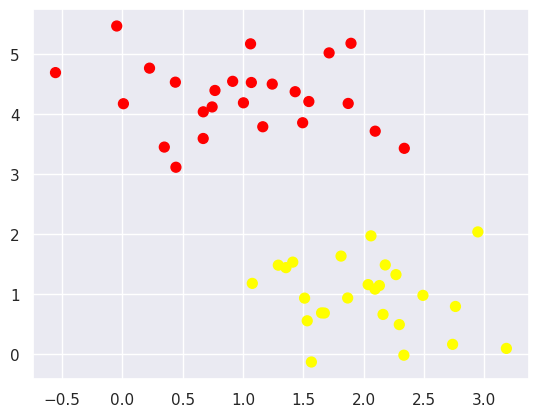

In [8]:
# The point of SVM is to draw a straight line separating the 2 sests of data, and thereby create a model for classification.
# SVM, the line that maximizes this margin is the one we will choose as the optimal model.
# SVM are an example of such a maximum margin estimator.
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.datasets import make_blobs
X_train, Y_train = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=50, cmap='autumn');

model = SVC(kernel='linear', C=1E10)
model.fit(X_train, Y_train)
#pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
#svc = SVC(kernel='rbf', class_weight='balanced')
#model = make_pipeline(pca, svc)
#param_grid = {'svc__C': [1, 5, 10, 50],
              #'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
#grid = GridSearchCV(model, param_grid)

#%time grid.fit(X_train, Y_train)
# print(grid.best_params_)

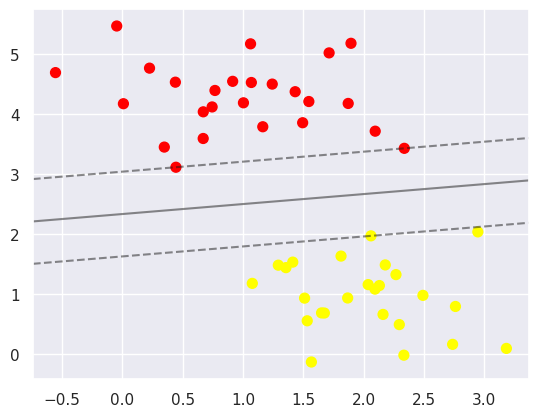

In [9]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
  """Plot the decision function for a 2D SVC"""
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # create grid to evaluate model
  X_train = np.linspace(xlim[0], xlim[1], 30)
  Y_train = np.linspace(ylim[0], ylim[1], 30)
  Y_test, X_test = np.meshgrid(Y_train, X_train)
  xy = np.vstack([X_test.ravel(), Y_test.ravel()]).T
  P = model.decision_function(xy). reshape(X_test.shape)

  # plot decision boundary and margins
  ax.contour(X_test, Y_test, P, colors='k',
             levels=[-1, 0, 1], alpha=0.5,
             linestyles=['--','-','--'])
  # plot support vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=50, cmap='autumn')
plot_svc_decision_function(model);

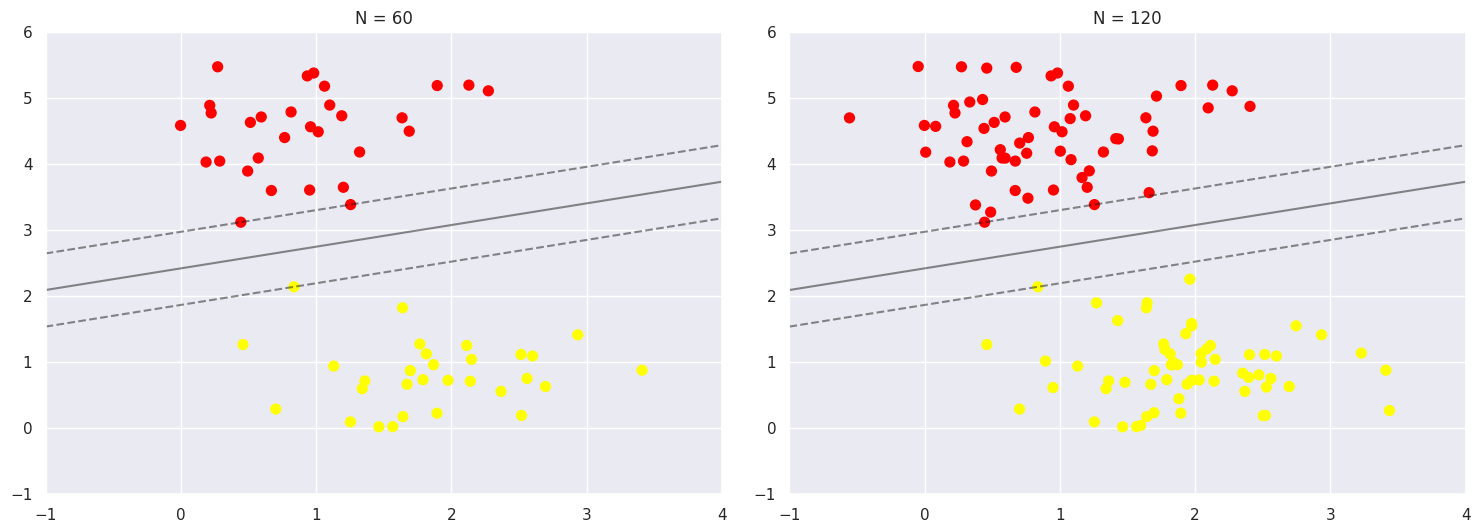

In [10]:
def plot_svm(N=10, ax=None):
  X_test, Y_train = make_blobs(n_samples=200, centers=2,
                               random_state = 0, cluster_std = 0.60)
  X_test = X_test[:N]
  Y_train = Y_train[:N]
  model = SVC(kernel='linear', C=1E10)
  model.fit(X_test, Y_train)

  ax = ax or plt.gca()
  ax.scatter(X_test[:, 0], X_test[:, 1], c = Y_train, s = 50, cmap='autumn')
  ax.set_xlim(-1, 4)
  ax.set_ylim(-1, 6)
  plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right = 0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
  plot_svm(N, axi)
  axi.set_title('N = {0}'.format(N))

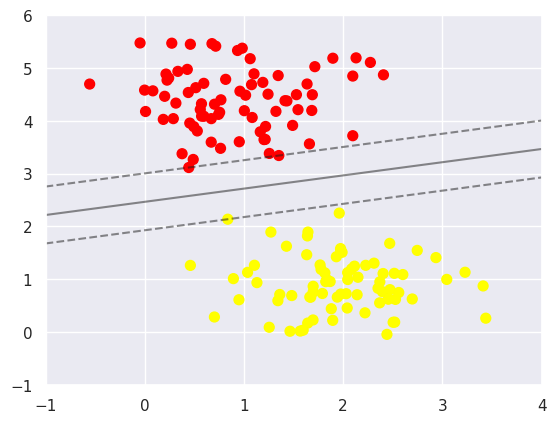

In [11]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 50, 100, 150, 200], ax=fixed(None));

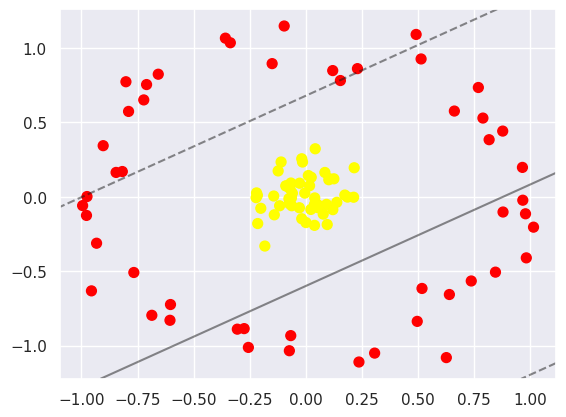

In [12]:
# Take a look at data that is not linearly seperable:
from sklearn.datasets import make_circles
X_train, Y_test = make_circles(100, factor=0.1, noise = 0.1)
clf = SVC(kernel='linear').fit(X_train, Y_test)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_test, s = 50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [13]:
#or example, one simple projection we could use would be to compute a radial basis function
#centered on the middle clump:
r = np.exp(-(X_train ** 2).sum(1))

interactive(children=(Dropdown(description='elev', options=(-180, 180), value=-180), IntSlider(value=30, descr…

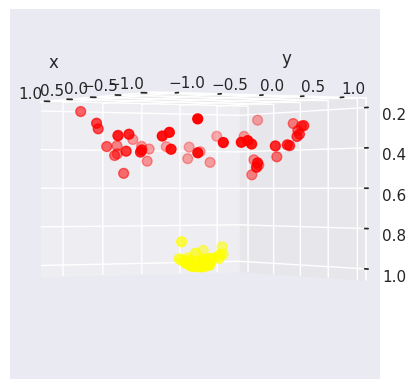

In [14]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X_train, y=Y_test):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X_train[:, 0], X_train[:, 1], r, c=Y_test, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-180, 180], azip=(-180, 180),
         X=fixed(X_train), Y_test=fixed(Y_test));

In [15]:
clf = SVC(kernel='rbf', C=1E6) #rbf: radial basis function
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
#Specifies the kernel type to be used in the algorithm.
#It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used.
clf.fit(X_train, Y_test)

SVC(C=1000000.0)

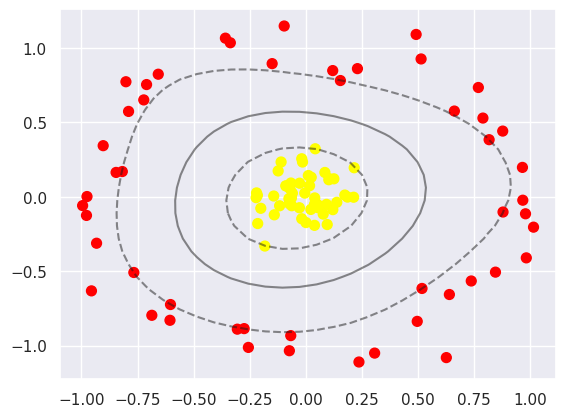

In [16]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_test, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

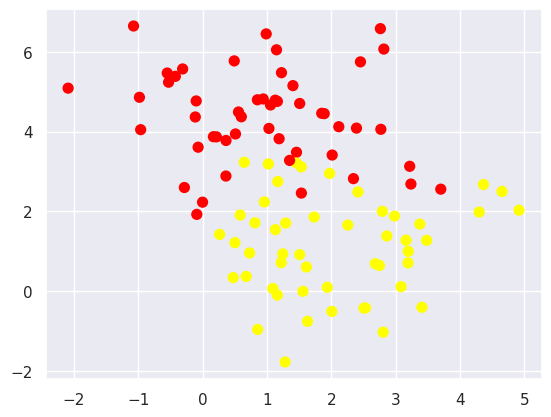

In [17]:
# Tuning the SVM: Softening Margins
# See below example
X_train, Y_test = make_blobs(n_samples=100, centers=2,
                             random_state=0, cluster_std=1.2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_test, s = 50, cmap='autumn')

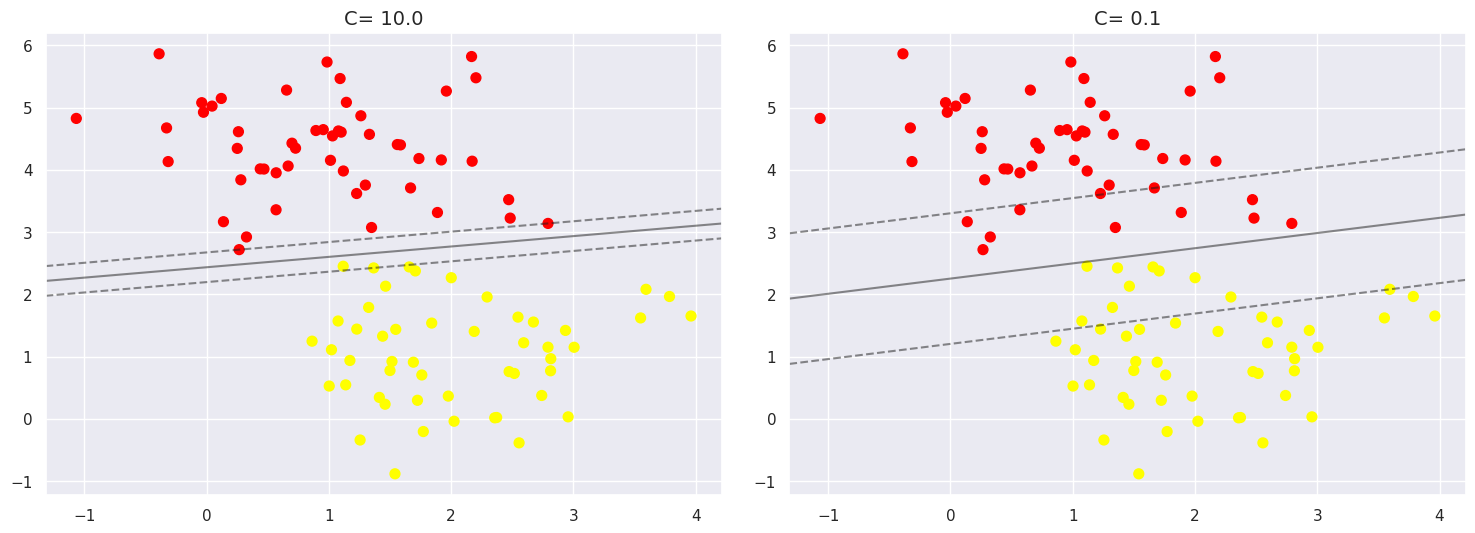

In [18]:
# The plot shown below gives a visual picture of how changing a C parameter affects the final fit.
X_train, Y_test = make_blobs(n_samples=100, centers=2,
                             random_state = 0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
  model = SVC(kernel='linear', C=C).fit(X_train, Y_test)
  axi.scatter(X_train[:, 0], X_train[:, 1], c=Y_test, s=50, cmap='autumn')
  plot_svc_decision_function(model, axi)
  axi.scatter(model.support_vectors_[:, 0],
              model.support_vectors_[:, 1],
              s=300, lw=1, facecolors='none');
  axi.set_title('C= {0:.1f}'.format(C), size=14)

Results vs Logistic Regression

Text(0.5, 427.9555555555555, 'Predicted label')

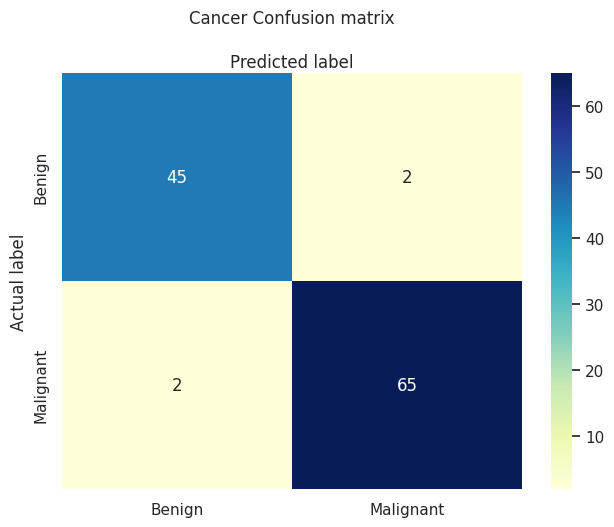

In [21]:
# redefine X_train, X_test, Y_train, and Y_test. all 4 variables were redefined here since they were used for SVM.

# Split the Data set into Training Data and Test Data.
# Training data will be used to train the Logistic model and Test data will be used to validate the model.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.20, random_state = 0) # 80% and 20% split between training and evaluation (test).
# Proper scaling is done via feature scaling, or scaling the data b/w 0 and 1 to get better accuracy.
# Scaling is important since theere is a huge difference between all the X inputs. This also standardizes.
# Scaler object is made
sc_X = StandardScaler()
# The scaler is fit to the training data and transform
X_train = sc_X.fit_transform(X_train)
# Apply the scaler to the test data
X_test = sc_X.transform(X_test)
X = sc_X.fit_transform(breast_input)

# Logistic Regression
# Make an instance classifier of the object LogisticRegression and give random_state = 0
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, Y_pred)
Y_pred[0:30]

# Confusion matrix is visualized using Heatmap.
cnf_matrix = confusion_matrix(Y_test, Y_pred)

fig, ax = plt.subplots()
class_names = ["Benign","Malignant"] # name of classes
# heatmap is created
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
plt.tight_layout()
plt.title('Cancer Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')